In [268]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate as sr
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import sample as sm
import hr_restrict as hrr
from matplotlib.animation import FuncAnimation
# warnings.filterwarnings('ignore')
from IPython.display import HTML

**Find Good Columns**

Time taken by sample is 0.0395 seconds
mismatch=0.012885224596137545, penalty=0.21407236176898742


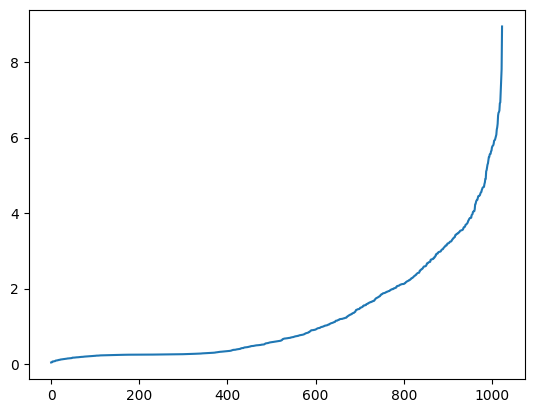

In [274]:
D_r, L0, L1, beta = 1024, 0.4, 3.5, 4e-5
def get_cn(W):
    c = np.max(np.abs(W), axis=0)
    return np.sort(c), np.argsort(c)[::-1]

    
L63_data_path = '../data/L63-trajectories'
save_folder = '../data/animW'
train = np.load('{}/validation.npy'.format(L63_data_path))[:, :20000]
sampler = hrr.GoodRowSampler(L0, L1, train)
Wb = sampler.sample(D_r)
W_in, b_in = Wb[:, :-1], Wb[:, -1]
model0 = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=W_in, b_in_fn=b_in)
model0.compute_W(train, beta)
phi_train = np.tanh(model0.W_in @ train[:, :-1] + model0.b_in[:, np.newaxis])
mismatch = ((model0.W @ phi_train - train[:, 1:])**2).sum()
penalty = beta*(model0.W**2).sum()
plt.plot(range(D_r), get_cn(model0.W)[0])
print(f'mismatch={mismatch}, penalty={penalty}')

**Findings ($\beta=4\times10^{-5}$): 1) mismatch $<$ penalty when $N_g=120$ , 2) 4mismatch $<$ penalty when $N_g=200$<br>
3) 6mismatch $<$ penalty when $N_g=300$**

**Start a surrogate model with $N_g=120$**

Time taken by sample is 0.0322 seconds


(0.0, 1023.0)

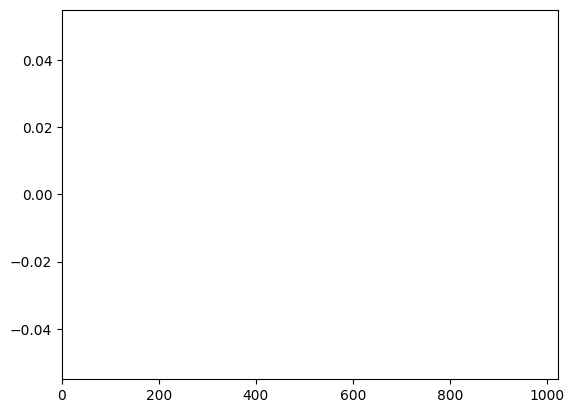

In [397]:
%matplotlib inline
N, final_D_r = 300, 1024
Wb = sampler.sample(final_D_r)
W_in, b_in = Wb[:, :-1], Wb[:, -1]
idx = get_cn(model0.W)[1]
W_in[:N, :], b_in[:N] = model0.W_in[idx[:N], :], model0.b_in[idx[:N]]
fig, ax = plt.subplots()
c = np.arange(final_D_r)
# line = ax.plot(c, list(get_cn(model0.W)[0][::-1][:N]) + [np.nan]*(final_D_r-N))[0]


def update1(frame):
    ax.clear()
    D_r = N + frame
    model = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=W_in[:D_r,:], b_in_fn=b_in[:D_r])
    model.compute_W(train, beta)
    line = ax.plot(c, list(get_cn(model.W)[0][::-1]) + [np.nan]*(final_D_r-D_r))
    ax.set_xlim((c.min(),c.max()))
    ax.set_ylim((0, 10))
    ax.set_ylabel(r'$\|\mathbf{W}^{j}\|_\infty$')
    return line

def update2(frame):
    # ax.clear()
    D_r = N + frame
    model = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=W_in[:D_r,:], b_in_fn=b_in[:D_r])
    model.compute_W(train, beta)
    line = ax.plot(c, list(get_cn(model.W)[0][::-1]) +\
                   [np.nan]*(final_D_r-D_r), label=fr'$N^0=${(np.max(np.abs(model.W), axis=0)<1).sum()}')
    ax.axvline(x=N, c='black')
    ax.set_xlim((c.min(),c.max()))
    ax.set_ylim((0, 10))
    ax.set_ylabel(r'$\|\mathbf{W}^{j}\|_\infty$')
    ax.legend()
    return line

def update3(frame):
    ax.clear()
    D_r = N + frame
    model = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=W_in[:D_r,:], b_in_fn=b_in[:D_r])
    model.compute_W(train, beta)
    line = ax.plot(c, list(get_cn(model.W[:, :N])[0][::-1]) + list(get_cn(model.W[:, N:])[0][::-1]) +\
                   [np.nan]*(final_D_r-D_r), label=fr'$N^0=${(np.max(np.abs(model.W), axis=0)<1).sum()}, $D_r=${model.D_r}')
    ax.axvline(x=N, c='black')
    ax.set_xlim((c.min(),c.max()))
    ax.set_ylim((0, 10))
    ax.set_ylabel(r'$\|\mathbf{W}^{j}\|_\infty$')
    ax.legend()
    return line

def update4(frame):
    # ax.legend([])
    model = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=W_in[:D_r,:], b_in_fn=b_in[:D_r])
    model.compute_W(train, beta)
    line = ax.plot(c, list(get_cn(model.W[:, :N])[0][::-1]) + list(get_cn(model.W[:, N:])[0][::-1]) +\
                   [np.nan]*(final_D_r-D_r))#, label=fr'$N^0=${(np.max(np.abs(model.W), axis=0)<1).sum()}, $D_r=${model.D_r}')
    ax.axvline(x=N, c='black')
    ax.axvline(x=N, c='black')
    ax.set_xlim((c.min(),c.max()))
    ax.set_ylim((0, 10))
    ax.set_ylabel(r'$\|\mathbf{W}^{j}\|_\infty$')
    # ax.legend()
    return line

def update5(frame):
    ax.clear()
    D_r = N + frame
    model = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=W_in[:D_r,:], b_in_fn=b_in[:D_r])
    model.compute_W(train, beta)
    line = ax.plot(c, list(np.max(np.abs(model.W[:, :N]), axis=0)) + list(np.max(np.abs(model.W[:, N:]), axis=0)) +\
                   [np.nan]*(final_D_r-D_r), label=fr'$N^0=${(np.max(np.abs(model.W), axis=0)<1).sum()}, $D_r=${model.D_r}')
    ax.axvline(x=N, c='black')
    ax.set_xlim((c.min(),c.max()))
    ax.set_ylim((0, 10))
    ax.set_ylabel(r'$\|\mathbf{W}^{j}\|_\infty$')
    ax.legend()
    # ax.set_xlabel(r'$j$')
    return line

def ud(frame):
    ax.clear()
    D_r = N + frame
    model = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=W_in[:D_r,:], b_in_fn=b_in[:D_r])
    model.compute_W(train, beta)
    return np.sort(np.max(np.abs(model.W), axis=0))[::-1][:100].mean()

def update6(frame):
    ax.clear()
    D_r = N + frame
    model = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=W_in[:D_r,:], b_in_fn=b_in[:D_r])
    model.compute_W(train, beta)
    M = np.max(model.W, axis=0).max()
    line = ax.plot(c, list(get_cn(model.W)[0][::-1]/M) +\
                   [np.nan]*(final_D_r-D_r), label=fr'$N^0=${(np.max(np.abs(model.W), axis=0)<1).sum()}, $D_r=${model.D_r}')
    ax.axvline(x=N, c='black')
    ax.set_xlim((c.min(),c.max()))
    ax.set_ylim((0, 1))
    ax.set_ylabel(r'$\|\mathbf{W}^{j}\|_\infty$')
    ax.legend()
    return line

ax.clear()
line = ax.plot(c, [np.nan]*final_D_r)[0]
ax.set_xlim((c.min(),c.max()))
# ani1 = FuncAnimation(fig=fig, func=update1, frames=range(0, final_D_r-N, 3), interval=30)
# ani2 = FuncAnimation(fig=fig, func=update2, frames=range(0, final_D_r-N, 3), interval=30)
# ani3 = FuncAnimation(fig=fig, func=update3, frames=range(0, final_D_r-N, 3), interval=30)
# ani4 = FuncAnimation(fig=fig, func=update4, frames=range(0, final_D_r-N, 10), interval=30)
# ani5 = FuncAnimation(fig=fig, func=update5, frames=range(0, final_D_r-N, 3), interval=30)
# ani6 = FuncAnimation(fig=fig, func=update6, frames=range(0, final_D_r-N, 3), interval=30)
# HTML(ani6.to_jshtml())

In [246]:
ani1.save(filename=f"../data/plots/mode_evol1_{final_D_r}.mp4", writer="ffmpeg")

In [280]:
ani2.save(filename=f"../data/plots/mode_evol2_{final_D_r}.mp4", writer="ffmpeg")

In [308]:
ani3.save(filename=f"../data/plots/mode_evol3_{N}_{final_D_r}.mp4", writer="ffmpeg")

In [309]:
ani4.save(filename=f"../data/plots/mode_evol4_{N}_{final_D_r}.mp4", writer="ffmpeg")

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-framerate', '33.333333333333336', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '../data/plots/mode_evol4_300_1024.mp4']' returned non-zero exit status 255.

In [310]:
ani5.save(filename=f"../data/plots/mode_evol5_{N}_{final_D_r}.mp4", writer="ffmpeg")

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-framerate', '33.333333333333336', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '../data/plots/mode_evol5_300_1024.mp4']' returned non-zero exit status 255.

In [398]:
a, w = [], 1
for f in range(0, 1024-300, 5):
    w_ = ud(f)
    a.append(w_)
    w = w_ + 0.

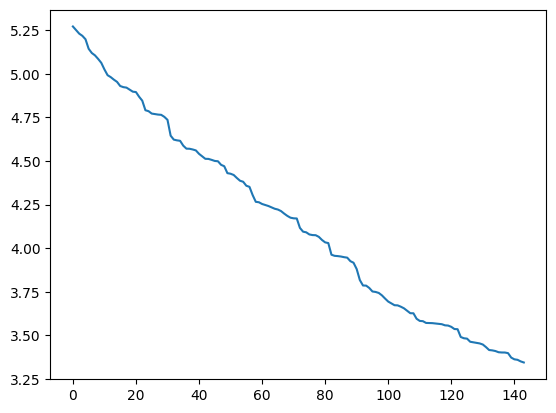

In [399]:
plt.plot(range(len(a)-1), a[1:])
plt.show()

In [381]:
ud(8).mean()

3.4336316646411245

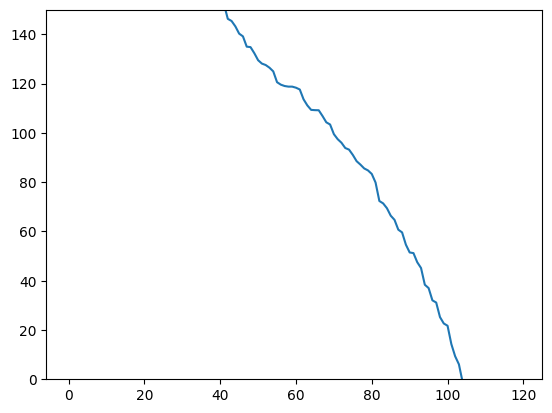

In [369]:
fig1, ax1 = plt.subplots()
N=120
y0 = 100*np.random.normal(size=N) + 100.
x = np.arange(N)
ax1.plot(x, np.sort(y0)[::-1])
alpha = 0.01
N0 = []
iter = []
def update(frame):
    ax1.clear()
    Y = y0*(1 - alpha)**frame
    ax1.plot(x, np.sort(Y)[::-1])
    iter.append(frame)
    N0.append((np.abs(Y)<10).sum())
    ax1.set_ylim((0, 150))
anim = FuncAnimation(fig=fig1, func=update, frames=range(0, 300, 3), interval=30) 
HTML(anim.to_jshtml())

In [373]:
x, y = np.array(iter[:-120]), np.array(N0[:-120])
reg = stats.linregress(x, y)
plt.plot(x, y, label=f'slope={reg.slope:.4f}')
plt.plot(x, reg.slope*x+reg.intercept, label=f'slope={reg.slope:.4f}')
plt.legend()

ValueError: Inputs must not be empty.

In [362]:
z = np.sort(y0)[::-1]
1/(z[1:] - z[:-1])

array([ -0.15917687,  -0.04935538,  -2.94120902,  -0.05525705,
        -0.17213903,  -0.2593551 ,  -0.32872588,  -0.25132013,
        -3.73609802,  -1.87249597,  -0.08156325,  -0.23360571,
        -1.02761471,  -0.09654506,  -0.0903779 ,  -0.38654387,
       -11.60258707,  -3.79777527,  -0.21692011,  -0.16135549,
        -0.71337048,  -0.38048127,  -0.75897605,  -5.80854716,
        -0.86320107,  -1.49671326,  -0.24479073,  -0.17865162,
        -0.21490606,  -2.73150131,  -0.75056228,  -1.01215775,
        -0.26264313,  -0.14512917,  -0.27326342,  -0.13098797,
        -1.34084291,  -1.98418298,  -1.32905697, -15.38709326,
        -0.38134822,  -1.55854448,  -0.49385954,  -1.58588703,
        -0.4268171 ,  -0.32102174,  -0.16870726,  -0.43707925,
        -0.37839443,  -0.38475997,  -0.1494743 ,  -1.86054987,
        -0.63936437,  -0.84581573,  -0.13405655,  -0.36773717,
        -1.5956925 ,  -1.0446447 ,  -0.19090117,  -1.05061466,
        -1.6300095 ,  -0.09766475,  -0.98190089,  -0.16

In [354]:
z

array([198.08026648, 197.82937759, 197.42622705, 196.41987274,
       195.35179059, 194.56487582, 192.16584262, 191.03906489,
       190.53616992, 190.20346549, 188.95010333, 186.63486791,
       186.0599929 , 185.6051128 , 184.79877439, 183.44890971,
       183.04600721, 182.70937653, 182.25517188, 182.25494005,
       181.99102302, 181.97735207, 181.22154413, 180.83630427,
       179.17061288, 178.08800545, 177.79642166, 177.19570648,
       175.92125938, 175.68002023, 175.57206649, 175.45250359,
       175.31897716, 172.85320946, 172.51502687, 171.94439713,
       170.06683598, 169.79924983, 168.40477014, 168.10654836,
       167.85028194, 167.05882228, 166.57400186, 166.28321192,
       164.53290143, 163.92295616, 163.65445992, 163.31542215,
       161.92072135, 161.61138478, 160.78009025, 160.12002525,
       158.57250581, 157.32831637, 156.98366139, 155.24382647,
       154.57245749, 153.65023348, 153.07792025, 152.75440322,
       152.13912635, 151.56081174, 151.32763194, 150.90

In [359]:
0.3**0.9

0.3383834619016498

In [367]:
k = [1/(1-0.01)**n for n in range(1000)]

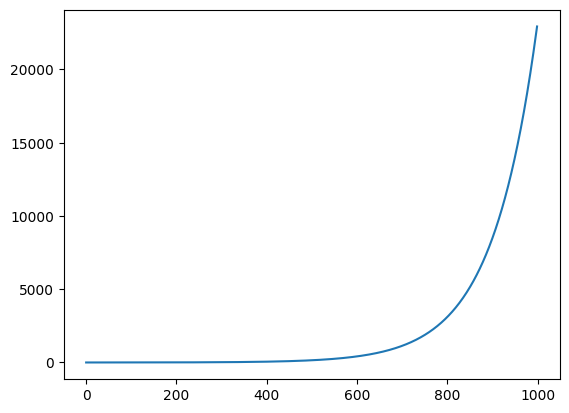

In [368]:
plt.plot(range(len(k)), k)